In [140]:
# reset namespace
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

## Create a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

In [141]:
np.random.randn(6,4)

array([[-1.6179114 , -1.79102386, -1.75560821,  1.02392354],
       [ 1.86239332, -0.24168783, -1.02992611, -2.39262058],
       [ 1.08665453, -0.20192417,  0.66592303,  1.26285758],
       [ 0.95732911, -1.88445685, -0.15958395, -0.47089288],
       [ 0.25355615,  0.34775492,  0.25513066, -0.40310433],
       [ 0.11229322,  1.22900897, -0.17121009, -1.20984657]])

In [142]:
dates = pd.date_range('20130101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,-0.059135,0.721581,-0.048124,-0.381529
2013-01-02,-0.882601,-1.544525,0.251878,-1.191599
2013-01-03,1.012530,-1.640988,-0.614654,-0.385478
2013-01-04,0.155512,1.066074,1.528379,-0.236967
2013-01-05,-0.221742,0.621569,-0.366137,0.476911
2013-01-06,-0.789796,-0.523325,1.352356,0.928262


In [143]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20130102'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' })


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Load Data from CSV File

In [144]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
french_cities = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
french_cities

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


### Exercise 1

- Use `head`and `tail` to display the begin and the end of the dataframe.
- Set index name to "City"
- Rename DataFrame Months in English. DataFrame columns are defined in a dictionary.

In [145]:
import locale, calendar

#FR : locale.setlocale(locale.LC_ALL,'')
locale.setlocale(locale.LC_ALL,'C')
months = calendar.month_abbr
print(*months)

 Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


In [146]:
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [147]:
french_cities.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


In [148]:
french_cities.index.name="City"

In [149]:
french_cities.columns= list(months)[1:]+['Lati','Long','Moye','Ampl',"Région"]
#french_cities.rename(columns=dict(zip(french_cities.columns[0:12], list(months)[1:12])), inplace = True)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


### Exercise 2
- Display `Lati` column
- `.loc` and `.iloc` allow to access individual values, slices or masked selections:
    - Display mean temperature in Rennes during September 
    - Display mean temperature in Rennes during September and December
    - Display mean temperature in Rennes from September to December
- Append a new column with standard deviation of temperature along the year.
- Remove this new column.
- Compute maximum value of `Mean` column.
- Compute maximum value of `Ampl` column.
- Convert the temperature mean from Celsius to Fahrenheit degree by creating a function $fahrenheit(T) = T*9/5+32$ and apply it to the column `Mean`.
- Sort observation by `Latitude` with northern cities on top.
- Sort observation by `Latitude` with southern cities on top..

#### Display Lati column

In [150]:
french_cities[["Lati"]]

,Lati
City,
Bordeaux,44.50
Brest,48.24
Clermont,45.47
Grenoble,45.10
...,...
Rennes,48.05
Strasbourg,48.35
Toulouse,43.36
Vichy,46.08


In [151]:
#french_cities['Lati']
french_cities.Lati

City
Bordeaux      44.50
Brest         48.24
Clermont      45.47
Grenoble      45.10
              ...  
Rennes        48.05
Strasbourg    48.35
Toulouse      43.36
Vichy         46.08
Name: Lati, Length: 15, dtype: float64

#### Display mean temperature in Rennes during September 

In [152]:
#french_cities.loc['Rennes']['Sep']
#french_cities[french_cities.index == "Rennes"][["Sep"]]
french_cities['Sep'].loc['Rennes']


15.7

#### Display mean temperature in Rennes during September and December 

In [153]:
#french_cities[french_cities.index == "Rennes"][["Sep","Dec"]]

#keys = ['Sep', 'Dec']
#for key in keys:
#    print(french_cities.loc['Rennes'].get(key))

[french_cities.loc['Rennes'].get(key) for key in ["Sep","Dec"]]

[15.7, 5.4]

In [154]:
#french_cities[french_cities.index == "Rennes"][["Sep","Dec"]]

#keys = ['Sep', 'Dec']
#for key in keys:
#    print(french_cities.loc['Rennes'].get(key))

[french_cities.loc['Rennes'].get(key) for key in ["Sep","Dec"]]

[15.7, 5.4]

#### Display mean temperature in Rennes between September and December 

In [155]:
#french_cities.loc['Rennes'][8:12]
french_cities[ list(french_cities.columns[8:12]) ][french_cities.index == "Rennes"]

,Sep,Oct,Nov,Dec
City,,,,
Rennes,15.7,11.6,7.8,5.4


#### Append a new column with standard deviation of temperature along the year

In [156]:
french_cities['Std'] = french_cities[ list(french_cities.columns[0:12]) ].std(axis=1)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,Std
City,,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE,6.770771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO,4.958800
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE,6.931723
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO,6.056977
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE,6.201148


#### Remove this new column.

In [157]:
french_cities.drop(columns='Std')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


#### Compute maximum value of `Moye` column

In [158]:
french_cities.Moye.max()

14.84

#### Compute maximum value of `Ampl` column

In [159]:
french_cities[['Ampl']].max()

Ampl    18.6
dtype: float64

#### Convert the temperature mean from Celsius to Fahrenheit degree by creating a function fahrenheit(T)=T∗9/5+32 and apply it to the column `Moye`

In [160]:
def fahrenheit(T):
    return T*(9./5)+32

french_cities["Moye"]=french_cities[["Moye"]].applymap(fahrenheit)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,Std
City,,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,55.994,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,51.386,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,51.692,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,51.764,18.6,SE,6.770771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,52.034,13.1,NO,4.958800
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,49.496,18.6,NE,6.931723
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,54.824,16.2,SO,6.056977
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,51.296,16.9,SE,6.201148


#### Sort observation by `Latitude` with northern cities on top.

In [161]:
french_cities.sort_values(by = ['Lati'], ascending = False)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,Std
City,,,,,,,,,,,,,,,,,,
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,49.514,14.7,NE,5.550648
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,52.124,15.7,NE,5.876894
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,49.496,18.6,NE,6.931723
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,51.386,10.2,NO,3.773673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,58.712,15.2,SE,5.646794
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,57.002,17.1,SE,6.247102
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,54.824,16.2,SO,6.056977
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,57.614,17.8,SE,6.480928


#### Sort observation by `Latitude` with southern cities on top.

In [162]:
french_cities.sort_values(by = ['Lati'], ascending = True)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,Std
City,,,,,,,,,,,,,,,,,,
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,57.614,17.8,SE,6.480928
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,57.002,17.1,SE,6.247102
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,54.824,16.2,SO,6.056977
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,58.712,15.2,SE,5.646794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,51.386,10.2,NO,3.773673
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,49.496,18.6,NE,6.931723
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,52.124,15.7,NE,5.876894
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,49.514,14.7,NE,5.550648


### Exercise 3

- Keep only the months columns and transpose the dataframe. Create a new dataframe called `city_temp` and plot the results using `plot` and `boxplot`.
- Use `describe`, `unique` and `value_counts` to the column `Region`.
- Convert the `Region` column  categorical type.
- Use `group_by` to display cities by `Region`.

#### Keep only the months columns and transpose the dataframe. Create a new dataframe called city_temp

In [163]:
city_temp=french_cities[ list(french_cities.columns[0:12]) ]
city_temp=city_temp.transpose()

##### Plot the results using plot

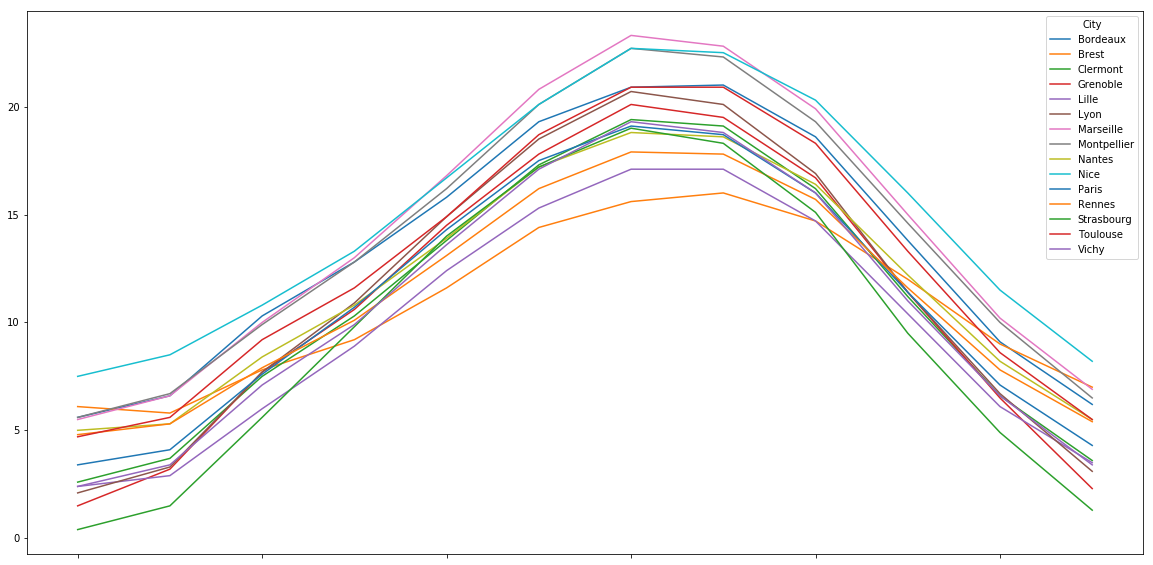

In [164]:
city_temp.plot(figsize=(20,10))

##### Plot the results using boxplot

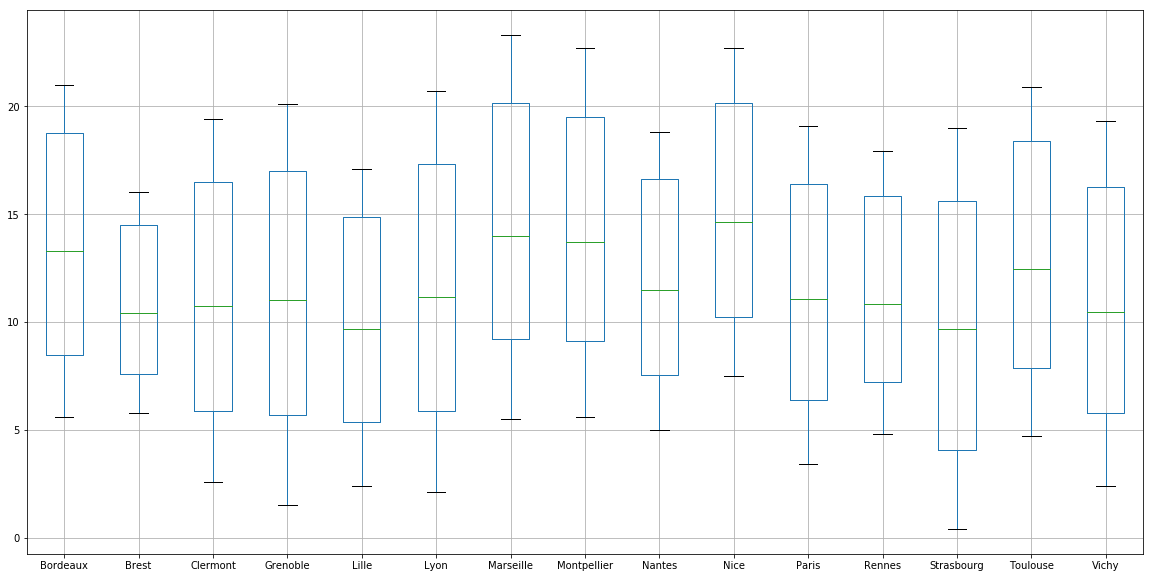

In [165]:
city_temp.boxplot(figsize=(20,10))

#### Use `describe`, `unique` and `value_counts` to the column `Region`

In [166]:
french_cities.Région.describe()

count     15
unique     4
top       SE
freq       7
Name: Région, dtype: object

In [167]:
french_cities.Région.unique()

array(['SO', 'NO', 'SE', 'NE'], dtype=object)

In [168]:
french_cities.Région.value_counts()

SE    7
NE    3
NO    3
SO    2
Name: Région, dtype: int64

#### Convert the `Region` column categorical type

In [169]:
french_cities.Région=french_cities.Région.astype('category')
french_cities.Région

City
Bordeaux      SO
Brest         NO
Clermont      SE
Grenoble      SE
              ..
Rennes        NO
Strasbourg    NE
Toulouse      SO
Vichy         SE
Name: Région, Length: 15, dtype: category
Categories (4, object): [NE, NO, SE, SO]

#### Use `group_by` to display cities by `Region`

In [170]:
# Add the index city as a column
french_cities.reset_index(inplace=True)
french_cities[["Région","City"]].groupby(['Région']).count()

,City
Région,
NE,3
NO,3
SE,7
SO,2
